In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the data

df = pd.read_csv('laptop_data.csv')

df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
# check the info of the df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [4]:
# Delete the redundant index column

df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
# check the details of the numerical columns

df.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


1. The laptop size ranges from 10 inches to 18.5 inches. 
2. Most of the laptops are in the range of 15.6 inches
3. The average price range of laptops is around 60,000.

In [6]:
# columns in the data frame

df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [7]:
# shape of the data frame

df.shape

(1303, 11)

In [8]:
# check for missing values 
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
df.isna()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1298,False,False,False,False,False,False,False,False,False,False,False
1299,False,False,False,False,False,False,False,False,False,False,False
1300,False,False,False,False,False,False,False,False,False,False,False
1301,False,False,False,False,False,False,False,False,False,False,False


There are no missing values in the data

In [10]:
# different companies of laptop available

print('The number of laptop producers are:', df["Company"].nunique())

print('The name of producers of laptop are', df['Company'].unique())

print('*' * 100)

df['Company'].value_counts()

The number of laptop producers are: 19
The name of producers of laptop are ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
****************************************************************************************************


Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

### Brand name price comparison

In [11]:
# price comparison of different manufacturers

company_grp = df.groupby(by='Company')

company_func = company_grp['Price'].aggregate(func=['mean','median','count']).apply(lambda x : np.round(x,decimals=2)).sort_values('mean',ascending=False)

company_func

,mean,median,count
Company,,,
Razer,178282.49,154458.72,7
LG,111834.72,111834.72,3
MSI,92116.23,85194.72,54
Google,89386.08,83063.52,3
Microsoft,85903.79,83622.96,6
Apple,83340.50,71378.68,21
Huawei,75870.72,75870.72,2
Samsung,75308.32,87858.72,9
Toshiba,67549.05,64548.72,48


- Razer and LG have products more focussed on the higher end of the market.
- Asus and lenovo produces more budget segment laptops.
- Many of the lesser name chinese brands have more products in the lower segment of the market.

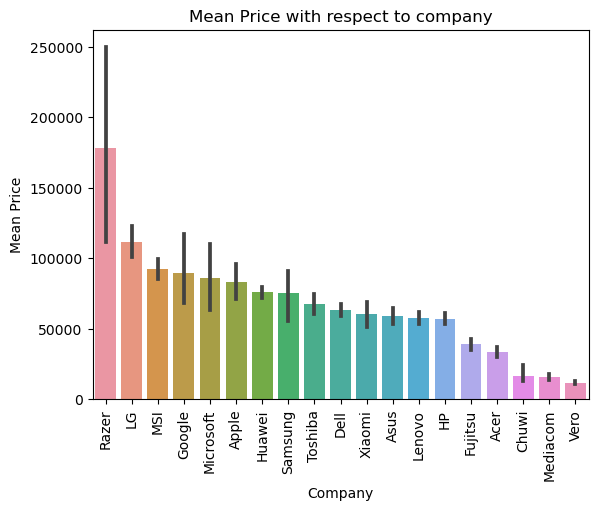

In [12]:
sns.barplot(x='Company',y='Price',data=df,estimator=np.mean,order=company_func.index)
plt.xticks(rotation=90)
plt.title('Mean Price with respect to company')
plt.ylabel('Mean Price')
plt.show()

### Laptops Types:

In [13]:
# check the different types of laptops

df['TypeName'].value_counts()

type_grp = df.groupby(by='TypeName')['Price'].aggregate(func=['mean','median'])

type_grp.sort_values('mean',ascending=False).apply(lambda x :np.round(x,decimals=2))

,mean,median
TypeName,,
Workstation,121497.53,110017.87
Gaming,92247.96,79536.38
Ultrabook,82489.71,79866.72
2 in 1 Convertible,68326.36,63882.72
Notebook,41669.15,36816.48
Netbook,33898.44,18115.20


In [14]:
# create a new segment column

def type_high_seg(x):
    if (x == 'Workstation') or (x == 'Gaming') or (x == 'Ultrabook'):
        return 'Yes'
    else:
        return 'No'
    
df['High_segment'] = df['TypeName'].apply(lambda x: type_high_seg(x))

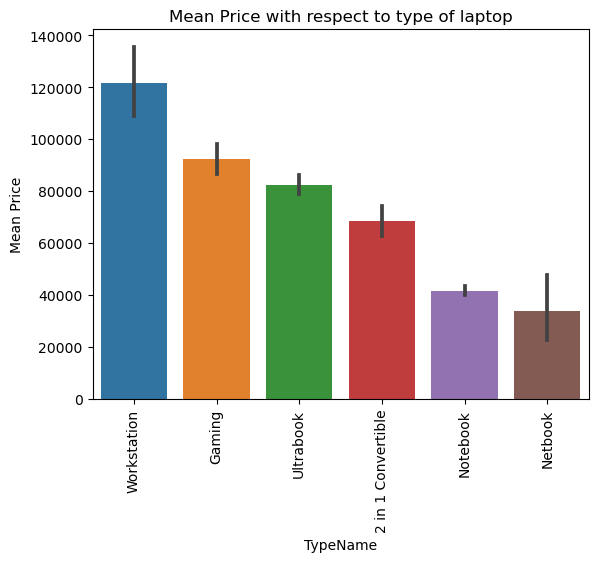

In [15]:
sns.barplot(x='TypeName',y='Price',data=df,estimator=np.mean,order=type_grp.sort_values(by='mean',ascending=False).index)
plt.xticks(rotation=90)
plt.title('Mean Price with respect to type of laptop')
plt.ylabel('Mean Price')
plt.show()

- Workstation laptops are the most expensive may be due to the hardware specs.
- Gaming laptops come second due to presence of better GPU's in them.
- Netbooks are the cheapest because they might be supporting low end hardware

### Laptop Screen size

In [16]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
High_segment         object
dtype: object

<AxesSubplot: xlabel='Price', ylabel='Density'>

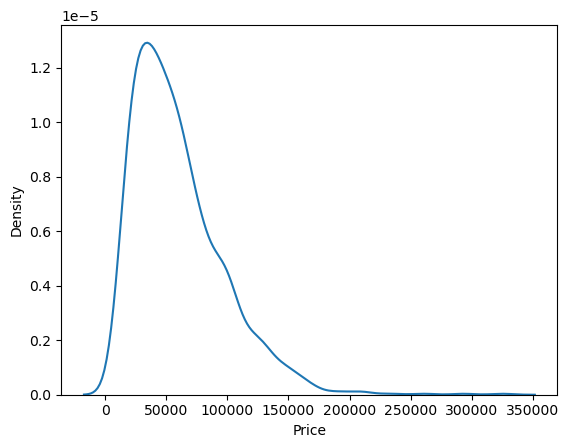

In [17]:
sns.kdeplot(x='Price',data=df)

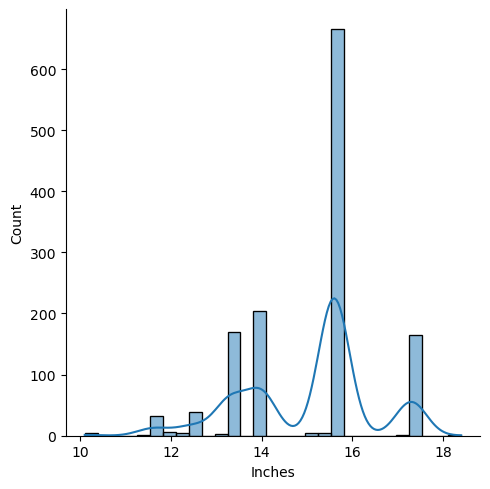

In [18]:
# inches of the laptop

sns.displot(x='Inches',data=df,kde='True')

The graph is trimodal in nature.     

Screen size of 13.5 inches, 15 inches and around 17 inches are prevalent.  

Some laptops are also available in screen sizes round and smaller than 10 inches and some larger than 18 inches are also available.

C:\Users\me pc\anaconda3\envs\myenv\Lib\site-packages\pandas\core\arrays\categorical.py:555: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


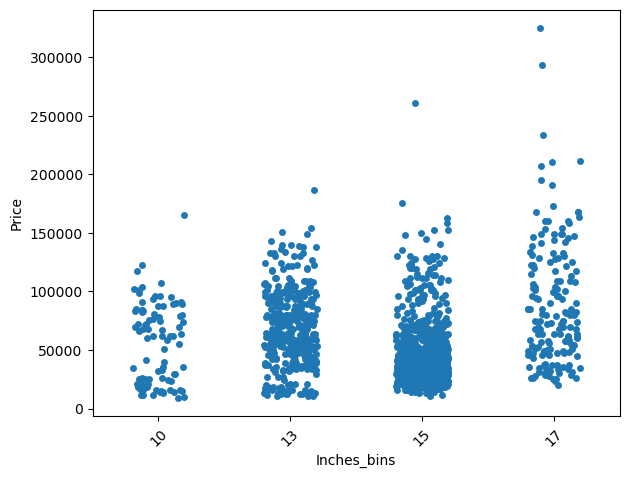

In [19]:
# screen size and price relationship

bins = [10,13,15,17,19]
labels = ['10','13','15','17']
df['Inches_bins'] = pd.cut(df["Inches"],bins,include_lowest=True,labels=labels)

sns.stripplot(x='Inches_bins',y='Price',data=df,jitter=0.2)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

- The bigger screen size the laptop has, the more expensive it is.

<AxesSubplot: xlabel='Inches_bins', ylabel='Count'>

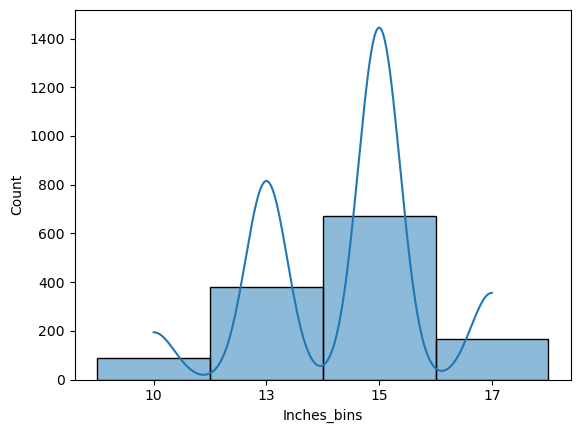

In [20]:
# Distribution of laptops based on screen size

sns.histplot(x='Inches_bins',data=df,kde=True)

<AxesSubplot: xlabel='Inches_bins', ylabel='Price'>

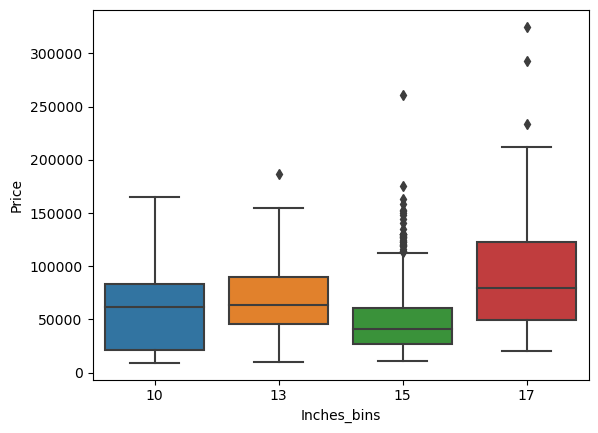

In [21]:
# plot box plots to check for outliers

sns.boxplot(x='Inches_bins',y='Price',data=df)

There are many expensive laptops in the 15 inch segment

In [22]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'High_segment',
       'Inches_bins'],
      dtype='object')

<AxesSubplot: xlabel='Inches_bins', ylabel='Price'>

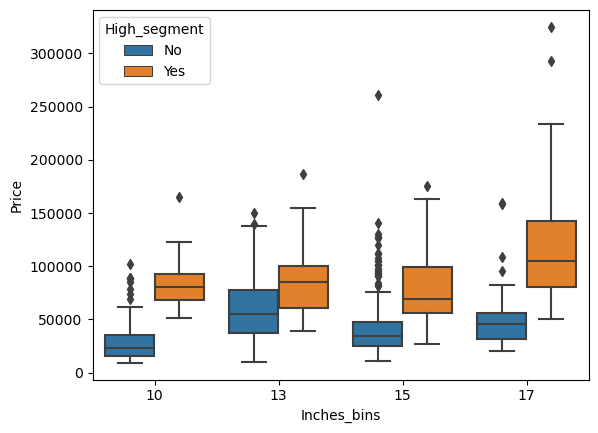

In [23]:
# check for types of laptops in the 15 inch category

sns.boxplot(x='Inches_bins',y='Price',data=df,hue='High_segment',hue_order=['No','Yes'])

It is observed that price ranges have a very high variance in the lower segment of laptops.

<AxesSubplot: xlabel='Inches_bins', ylabel='Price'>

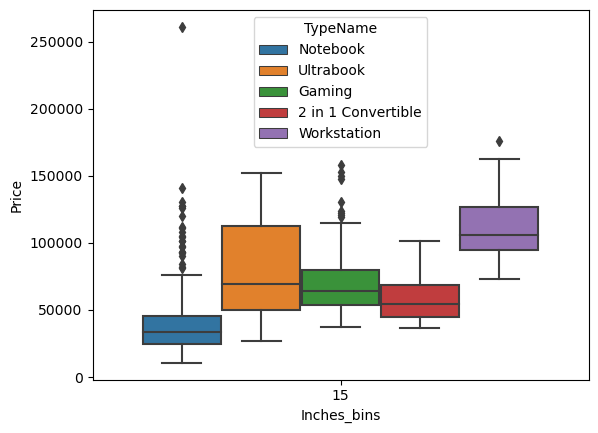

In [24]:
df_15_inch = df[df['Inches_bins'] == '15'].copy()
df_15_inch

sns.boxplot(x='Inches_bins',y='Price',data=df_15_inch,hue='TypeName',order=['15'])

- Many laptops in the Notebook and Gaming laptops category have a higher price then the rest.

This might be due to presence or absence of high end GPU's in the laptop or can be due to other powerful hardware present.

In [25]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,High_segment,Inches_bins
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Yes,13
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Yes,13
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,No,15
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,Yes,15
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Yes,13


### Screen resolution

In [26]:
df[['TypeName','ScreenResolution',"Price"]].sort_values(by='Price',ascending=False).head(10)

,TypeName,ScreenResolution,Price
196,Gaming,4K Ultra HD / Touchscreen 3840x2160,324954.720
830,Gaming,4K Ultra HD / Touchscreen 3840x2160,292986.720
610,Notebook,IPS Panel 4K Ultra HD 3840x2160,261018.720
749,Workstation,IPS Panel Full HD 1920x1080,233845.920
1066,Gaming,IPS Panel Full HD 1920x1080,211788.000
1136,Workstation,IPS Panel Full HD 1920x1080,210424.032
238,Gaming,Full HD 1920x1080,207259.200
723,Gaming,4K Ultra HD 3840x2160,194972.832
780,Gaming,IPS Panel Full HD 1920x1080,191211.264
1231,Gaming,Full HD 1920x1080,186426.720


In [27]:
df[['TypeName','ScreenResolution',"Price"]].sort_values(by='Price',ascending=False).tail(10)

,TypeName,ScreenResolution,Price
1102,Notebook,1366x768,11135.520
1282,Netbook,1366x768,11135.520
1296,Netbook,1366x768,11135.520
1268,Netbook,1366x768,11135.520
791,Notebook,1920x1080,10810.512
290,Notebook,1366x768,10602.720
31,Notebook,1366x768,10602.720
1120,Notebook,Full HD 1920x1080,10442.880
20,Netbook,1366x768,10224.432
1215,Netbook,1366x768,9270.720


In [28]:
# screen resolutions column

df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [29]:
import re

def sep_resolution(text):
    pattern = re.compile('\d{3,}')
    resolution = pattern.findall(text)
    return resolution

df['Horizontal_resolution'] = df['ScreenResolution'].apply(lambda x : sep_resolution(x)[0])
df['Vertical_resolution'] = df['ScreenResolution'].apply(lambda x : sep_resolution(x)[1])

In [30]:
sep_resolution('2560x1440')[1]

'1440'

In [31]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,High_segment,Inches_bins,Horizontal_resolution,Vertical_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Yes,13,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Yes,13,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,No,15,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,Yes,15,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Yes,13,2560,1600


In [32]:
df[['ScreenResolution','Horizontal_resolution','Vertical_resolution']].sample(30)

,ScreenResolution,Horizontal_resolution,Vertical_resolution
134,1366x768,1366,768
849,Full HD 1920x1080,1920,1080
185,Full HD / Touchscreen 1920x1080,1920,1080
947,Full HD 1920x1080,1920,1080
1060,Full HD 1920x1080,1920,1080
1279,IPS Panel Full HD 1920x1080,1920,1080
291,Full HD 1920x1080,1920,1080
46,1366x768,1366,768
280,1600x900,1600,900
777,IPS Panel Full HD 1920x1080,1920,1080


In [33]:
# convert to numerical columns

df['Horizontal_resolution'] = df['Horizontal_resolution'].astype('int32')
df['Vertical_resolution'] = df['Vertical_resolution'].astype('int32')
df['Inches_bins'] = df['Inches_bins'].astype('int32')

In [34]:
df.dtypes

Company                   object
TypeName                  object
Inches                   float64
ScreenResolution          object
Cpu                       object
Ram                       object
Memory                    object
Gpu                       object
OpSys                     object
Weight                    object
Price                    float64
High_segment              object
Inches_bins                int32
Horizontal_resolution      int32
Vertical_resolution        int32
dtype: object

In [35]:
# create a new higher resolution displays column
def create_high_res(number):
    if number > 1200:
        return True
    else:
        return False
    
df['High_res'] = df['Vertical_resolution'].apply(lambda x : create_high_res(x))

In [36]:
# do value counts on high_res displays

df['High_res'].value_counts(normalize=True)

False    0.90637
True     0.09363
Name: High_res, dtype: float64

<AxesSubplot: xlabel='High_res', ylabel='count'>

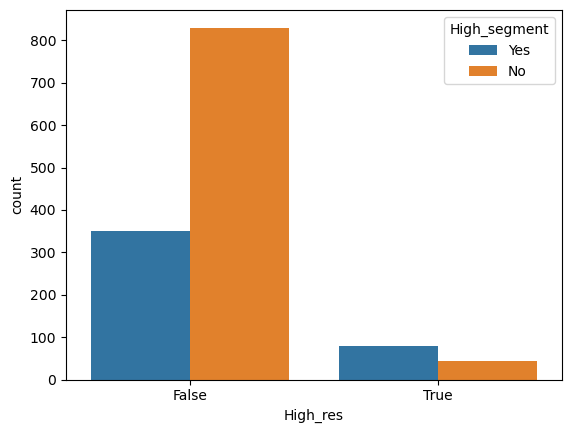

In [37]:
sns.countplot(x='High_res',data=df,hue="High_segment")

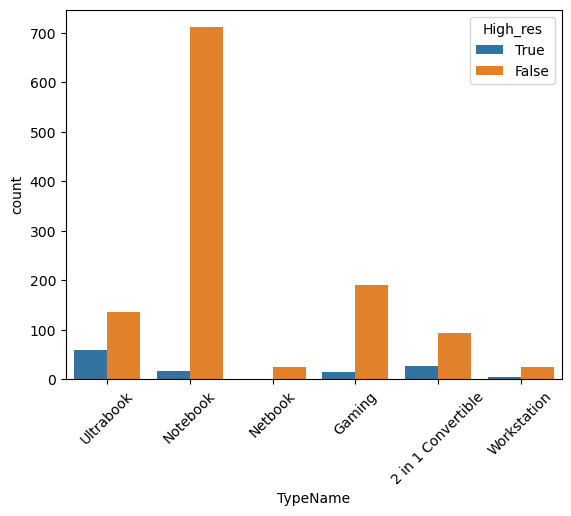

In [38]:
# check how many high resolution displays are workstations

sns.countplot(x='TypeName',data=df,hue='High_res',hue_order=[True,False])
plt.xticks(rotation=45)
plt.show()

The Ultrabooks and thin and light convertibles have higher ratio of high resolution displays.   
Netbook segment because it is the cheapest option has no high resolution displays.

In [39]:
df['ScreenResolution'].str.contains('Touchscreen').head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: ScreenResolution, dtype: bool

In [40]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [41]:
def has_touchscreen(text):
  if "Touchscreen" in text.split(' '):
    return True
  else:
    return False


In [42]:
# Make touchscreen column

df['Has_touchscreen'] = df['ScreenResolution'].apply(lambda x : has_touchscreen(x))

In [43]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,High_segment,Inches_bins,Horizontal_resolution,Vertical_resolution,High_res,Has_touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Yes,13,2560,1600,True,False
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Yes,13,1440,900,False,False
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,No,15,1920,1080,False,False
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,Yes,15,2880,1800,True,False
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Yes,13,2560,1600,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,No,13,1920,1080,False,True
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,No,13,3200,1800,True,True
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,No,13,1366,768,False,False
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,No,15,1366,768,False,False


In [44]:
df[['ScreenResolution','Has_touchscreen']].sample(30)

,ScreenResolution,Has_touchscreen
996,IPS Panel Full HD / Touchscreen 1920x1080,True
801,Full HD 1920x1080,False
559,1366x768,False
56,Full HD 1920x1080,False
621,Full HD 1920x1080,False
286,IPS Panel Full HD 1920x1080,False
756,IPS Panel Full HD 1920x1080,False
194,IPS Panel Full HD / Touchscreen 1920x1080,True
613,1366x768,False
536,Full HD 1920x1080,False


In [45]:
df['ScreenResolution'].str.contains('Touchscreen').sum()

192

In [46]:
df['Has_touchscreen'].sum()

192

In [47]:
def is_ips(text):
  if 'IPS' in text.split(' '):
    return True
  else:
    return False


In [48]:
# check if the display is IPS

df['Is_IPS'] = df['ScreenResolution'].apply(lambda x : is_ips(x))

In [49]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,High_segment,Inches_bins,Horizontal_resolution,Vertical_resolution,High_res,Has_touchscreen,Is_IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Yes,13,2560,1600,True,False,True
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Yes,13,1440,900,False,False,False
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,No,15,1920,1080,False,False,False
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,Yes,15,2880,1800,True,False,True
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Yes,13,2560,1600,True,False,True


### CPU

In [50]:
# Take information out of the CPU column

df['Cpu'].value_counts().sample(50)

Intel Core i3 7100U 2.4GHz                37
Intel Core i7 7700HQ 2.8GHz              146
Intel Core i3 7130U 2.7GHz                 8
Intel Celeron Dual Core 3855U 1.6GHz       3
Intel Core M m3 1.2GHz                     1
Intel Core i7 6920HQ 2.9GHz                1
Intel Core i7 8650U 1.9GHz                 2
Intel Core i7 7500U 2.7GHz               134
Intel Pentium Quad Core N4200 1.1GHz      14
Intel Core i7 7820HK 2.9GHz                7
Intel Core i5 1.3GHz                       1
Intel Core M 6Y54 1.1GHz                   1
AMD A9-Series 9410 2.9GHz                  3
AMD A4-Series 7210 2.2GHz                  1
Intel Pentium Dual Core N4200 1.1GHz       1
Intel Core i3 6006U 2.2GHz                 1
Intel Core i7 7600U 2.8GHz                13
Intel Core i5 6260U 1.8GHz                 1
AMD E-Series 7110 1.8GHz                   2
Intel Core i7 6600U 2.6GHz                18
AMD A10-Series A10-9620P 2.5GHz            2
AMD A6-Series 9220 2.5GHz                  7
Intel Cele

In [51]:
def cpu_brand(text):
  if ('Intel') in text.split(' '):
    return 'Intel'
  elif "AMD" in text.split(' '):
    return 'AMD'
  else:
    return 'Others'

df['Cpu_Brand'] = df['Cpu'].apply(lambda x: cpu_brand(x))

In [52]:
df[['Cpu','Cpu_Brand']].sample(60)

,Cpu,Cpu_Brand
1209,Intel Core i7 7700HQ 2.8GHz,Intel
77,Intel Core i7 8550U 1.8GHz,Intel
662,Intel Core i5 6200U 2.3GHz,Intel
527,Intel Core i3 6006U 2GHz,Intel
134,Intel Core i7 7500U 2.7GHz,Intel
996,Intel Core i7 7500U 2.7GHz,Intel
999,Intel Core i7 7500U 2.7GHz,Intel
595,Intel Core i3 6100U 2.3GHz,Intel
1062,Intel Core i5 7200U 2.5GHz,Intel
1180,Intel Core i5 6200U 2.3GHz,Intel


<AxesSubplot: xlabel='Cpu_Brand', ylabel='count'>

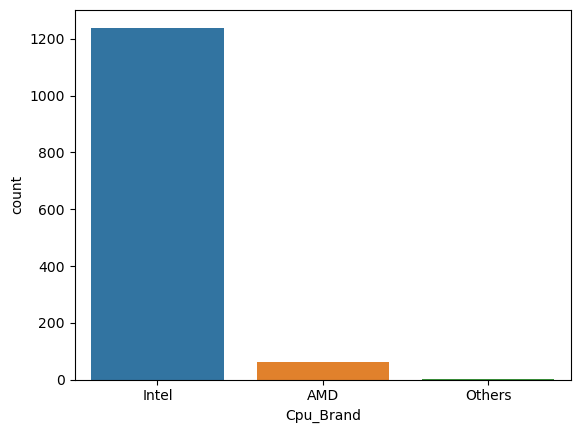

In [53]:
df['Cpu_Brand'].value_counts()

sns.countplot(x='Cpu_Brand',data=df)

In [54]:
# drop the others column
others_index =  df[df['Cpu_Brand'] == 'Others'].index

df.drop(index=others_index,inplace=True)

In [55]:
df['Cpu_Brand'].value_counts()

Intel    1240
AMD        62
Name: Cpu_Brand, dtype: int64

In [56]:
df['Cpu'].sample(60)

501               Intel Core i5 7200U 2.5GHz
824               Intel Core i5 7200U 2.5GHz
634     Intel Celeron Dual Core N3350 1.1GHz
389               Intel Core i7 7500U 2.7GHz
494              Intel Core i7 6700HQ 2.6GHz
195               Intel Core i5 8250U 1.6GHz
668               Intel Core i5 7200U 2.5GHz
1008              Intel Core i5 7200U 2.5GHz
230               Intel Core i3 7100U 2.4GHz
445              Intel Core i5 7440HQ 2.8GHz
973               Intel Core i5 6200U 2.3GHz
170               Intel Core i5 7200U 2.5GHz
56                  Intel Core i3 6006U 2GHz
697              Intel Core M M3-6Y30 0.9GHz
694               Intel Core i5 7200U 2.5GHz
395                  AMD A9-Series 9420 3GHz
106                 Intel Core i3 6006U 2GHz
46                  Intel Core i3 6006U 2GHz
939              Intel Core i7 6820HK 2.7GHz
1178             Intel Core i7 6700HQ 2.6GHz
1                       Intel Core i5 1.8GHz
664              Intel Core i7 7700HQ 2.8GHz
528       

In [57]:
def cpu_model(text):
  cpu_model_pattern = re.compile('i\d{1}')
  if len(cpu_model_pattern.findall(text)) > 0:
    return (cpu_model_pattern.findall(text)[0])
  else:
    return 'Others'

df['Cpu_model'] = df['Cpu'].apply(lambda x: cpu_model(x))


In [58]:
df[['Cpu','Cpu_model']].sample(70)

,Cpu,Cpu_model
1171,Intel Core i7 8550U 1.8GHz,i7
1095,Intel Core i5 7200U 2.5GHz,i5
1130,Intel Core i7 7500U 2.7GHz,i7
730,Intel Core i7 6700HQ 2.6GHz,i7
487,Intel Core i7 7700HQ 2.8GHz,i7
...,...,...
937,Intel Core i7 7700HQ 2.8GHz,i7
1266,AMD A9-Series 9410 2.9GHz,Others
1013,Intel Core i7 6500U 2.5GHz,i7
1148,Intel Core i5 6200U 2.3GHz,i5


In [59]:
def clock_freq(text):
  pattern = re.compile('\d{1,}\.*\d*GHz')

  out = pattern.findall(text)[0]
  return out.replace('GHz','')

df['Cpu_clock_freq'] = df['Cpu'].apply(lambda x: clock_freq(x))


In [60]:
df[['Cpu','Cpu_clock_freq']].sample(60)

,Cpu,Cpu_clock_freq
1270,Intel Core i7 6500U 2.5GHz,2.5
1126,Intel Atom x5-Z8550 1.44GHz,1.44
571,Intel Pentium Quad Core N3710 1.6GHz,1.6
76,Intel Core i5 7200U 2.5GHz,2.5
927,Intel Core i5 6200U 2.3GHz,2.3
761,Intel Core i7 7600U 2.8GHz,2.8
391,Intel Core i7 7700HQ 2.8GHz,2.8
522,Intel Core i5 7300U 2.6GHz,2.6
658,Intel Core i7 6700HQ 2.6GHz,2.6
792,Intel Core i7 7500U 2.7GHz,2.7


In [61]:
df['Cpu_model'] = df['Cpu_Brand'] + ' ' + df['Cpu_model']

df[['Cpu','Cpu_model']]

,Cpu,Cpu_model
0,Intel Core i5 2.3GHz,Intel i5
1,Intel Core i5 1.8GHz,Intel i5
2,Intel Core i5 7200U 2.5GHz,Intel i5
3,Intel Core i7 2.7GHz,Intel i7
4,Intel Core i5 3.1GHz,Intel i5
...,...,...
1298,Intel Core i7 6500U 2.5GHz,Intel i7
1299,Intel Core i7 6500U 2.5GHz,Intel i7
1300,Intel Celeron Dual Core N3050 1.6GHz,Intel Others
1301,Intel Core i7 6500U 2.5GHz,Intel i7


In [62]:
df['Cpu_model'].value_counts()

Intel i7        527
Intel i5        423
Intel Others    154
Intel i3        136
AMD Others       62
Name: Cpu_model, dtype: int64

<AxesSubplot: xlabel='Cpu_model', ylabel='Price'>

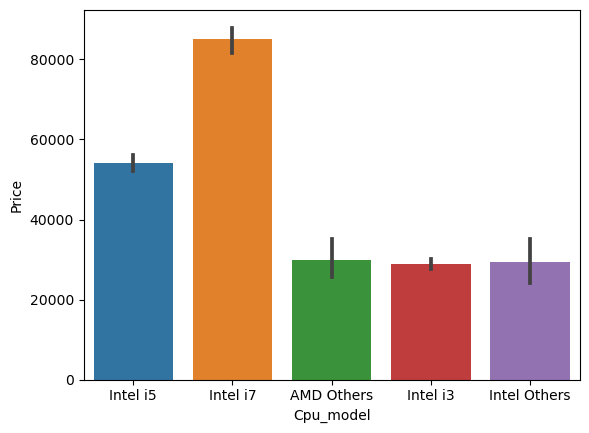

In [63]:
sns.barplot(x='Cpu_model',y='Price',data=df,estimator=np.mean)

- The intel core i7 models are generally found in higher price range of laptops
- The intel core i5 captures the middle price segment of the market
- AMD,intel core i3 and other intel CPU's capture the lower end of the market. 

In [64]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,High_segment,Inches_bins,Horizontal_resolution,Vertical_resolution,High_res,Has_touchscreen,Is_IPS,Cpu_Brand,Cpu_model,Cpu_clock_freq
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,Yes,13,2560,1600,True,False,True,Intel,Intel i5,2.3
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,Yes,13,1440,900,False,False,False,Intel,Intel i5,1.8
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,No,15,1920,1080,False,False,False,Intel,Intel i5,2.5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,Yes,15,2880,1800,True,False,True,Intel,Intel i7,2.7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,Yes,13,2560,1600,True,False,True,Intel,Intel i5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,...,No,13,1920,1080,False,True,True,Intel,Intel i7,2.5
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,...,No,13,3200,1800,True,True,True,Intel,Intel i7,2.5
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,...,No,13,1366,768,False,False,False,Intel,Intel Others,1.6
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,...,No,15,1366,768,False,False,False,Intel,Intel i7,2.5


### RAM

In [65]:
df['Ram'] = df['Ram'].apply(lambda x : x.replace('GB',''))

In [66]:
df['Ram'] = df['Ram'].astype('int')

In [67]:
df['Ram'].value_counts()

8     619
4     374
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

In [68]:
type_grp = df.groupby('High_segment')

type_grp['Ram'].value_counts(normalize=True)


High_segment  Ram
No            8      0.433486
              4      0.411697
              16     0.064220
              6      0.045872
              2      0.025229
              12     0.017202
              32     0.002294
Yes           8      0.560465
              16     0.334884
              4      0.034884
              32     0.034884
              12     0.023256
              24     0.006977
              6      0.002326
              64     0.002326
Name: Ram, dtype: float64

In [69]:
range_list = {}
for r in np.sort(df['Ram'].unique()):
    min_range = df[df['Ram'] == r]['Price'].min()  
    max_range = df[df['Ram'] == r]['Price'].max()
    diff = np.round(max_range - min_range)
    range_list[r] = (np.round(min_range),np.round(max_range))
    
range_list

{2: (9271.0, 20193.0),
 4: (10443.0, 95851.0),
 6: (21792.0, 50563.0),
 8: (17529.0, 210424.0),
 12: (32448.0, 122491.0),
 16: (45768.0, 233846.0),
 24: (67612.0, 158135.0),
 32: (68145.0, 324955.0),
 64: (211788.0, 211788.0)}

<AxesSubplot: xlabel='Ram', ylabel='Price'>

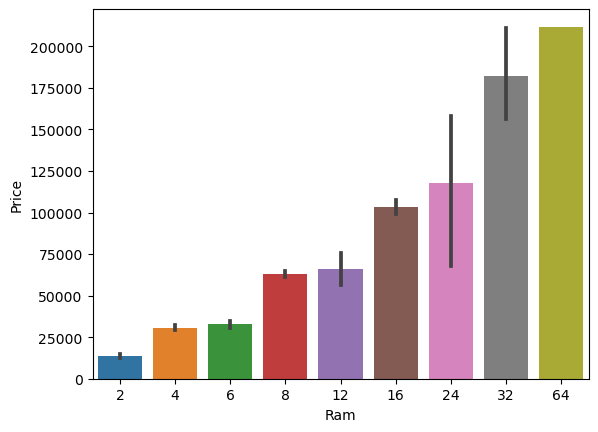

In [70]:
sns.barplot(x='Ram',y='Price',data=df)

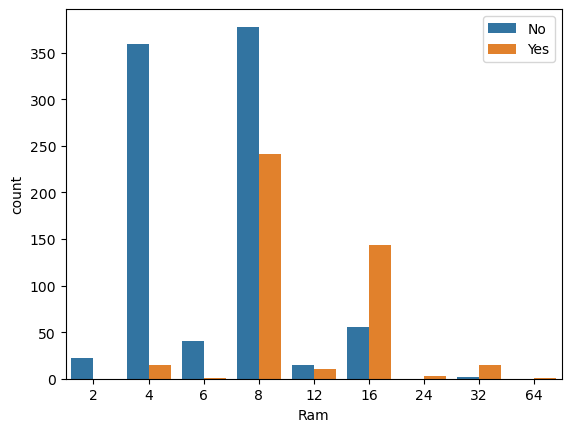

In [109]:
sns.countplot(x='Ram',data=df,hue='High_segment',order=[2,4,6,8,12,16,24,32,64],hue_order=['No','Yes'])
plt.legend(loc=1)
plt.show()

In lower end of the segment the 4GB and the 6GB capacity are more prevalant.   
In the higher end of the segment the 16 GB and upwards of memory is used.

In [72]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,High_segment,Inches_bins,Horizontal_resolution,Vertical_resolution,High_res,Has_touchscreen,Is_IPS,Cpu_Brand,Cpu_model,Cpu_clock_freq
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,Yes,13,2560,1600,True,False,True,Intel,Intel i5,2.3
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,Yes,13,1440,900,False,False,False,Intel,Intel i5,1.8
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,No,15,1920,1080,False,False,False,Intel,Intel i5,2.5


In [73]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'High_segment',
       'Inches_bins', 'Horizontal_resolution', 'Vertical_resolution',
       'High_res', 'Has_touchscreen', 'Is_IPS', 'Cpu_Brand', 'Cpu_model',
       'Cpu_clock_freq'],
      dtype='object')

In [74]:
# Dropping redundant columns

df.drop(columns=['ScreenResolution','Cpu','Cpu_Brand'],inplace=True)

### Storage

In [75]:
df['Memory'].value_counts()[df['Memory'].value_counts().index.str.contains('Hybrid')]

1.0TB Hybrid                 9
508GB Hybrid                 1
512GB SSD +  1.0TB Hybrid    1
256GB SSD +  1.0TB Hybrid    1
Name: Memory, dtype: int64

In [76]:
# replace TB with 1000 GB

df["Memory"] = df['Memory'].apply(lambda x: x.replace('1TB','1000GB'))

In [77]:
df['Memory'] = df['Memory'].str.replace('Hybrid','HDD')

In [78]:
# replace 1.0TB with 1000 GB

df["Memory"] = df['Memory'].apply(lambda x: x.replace('1.0TB','1000GB'))

In [79]:
# replace 2TB with 2000GB

df["Memory"] = df['Memory'].apply(lambda x: x.replace('2TB','1000GB'))

In [80]:
# split at +

temp_storage = df['Memory'].str.split('+',expand=True)

In [81]:
df['Memory'].value_counts().sum()

1302

In [82]:
df['Memory'] = df['Memory'].str.replace('508GB','500GB')

In [83]:
df['Memory'].value_counts()

256GB SSD                           412
1000GB HDD                          249
500GB HDD                           133
512GB SSD                           118
128GB SSD +  1000GB HDD              96
256GB SSD +  1000GB HDD              84
128GB SSD                            76
32GB Flash Storage                   37
512GB SSD +  1000GB HDD              18
64GB Flash Storage                   15
1000GB SSD                           14
256GB Flash Storage                   8
16GB Flash Storage                    7
32GB SSD                              6
180GB SSD                             5
128GB Flash Storage                   4
16GB SSD                              3
256GB SSD +  256GB SSD                2
256GB SSD +  500GB HDD                2
512GB Flash Storage                   2
1000GB SSD +  1000GB HDD              2
32GB HDD                              1
240GB SSD                             1
128GB HDD                             1
512GB SSD +  256GB SSD                1


#### Steps to make the split and calculate the storage:-

1. Split the memory column on the '+' and create two new columns with name mem_split1 and mem_split2.
2. Make 3 New columns with name of HDD, SDD, Flash storage and instantiate all with 0.
3. Read every row and check for the presence of HDD, SDD and Flash and then add the number to the destination column accordingly.
4. Do the same with the second split and add the values to the existing 3 columns.
5. By doing this we add the storage capacity of the two splits together.

In [84]:
df['mem_split1'] = df['Memory'].str.split('+',expand=True)[0]
df['mem_split2'] = df['Memory'].str.split('+',expand=True)[1]

In [85]:
df['HDD'] = 0
df['SSD'] = 0
df['Flash'] = 0

In [86]:
df['mem_split1']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301             1000GB HDD
1302              500GB HDD
Name: mem_split1, Length: 1302, dtype: object

In [87]:
df['HDD'] = df['mem_split1'].apply(lambda x : int(x.split()[0].replace('GB','')) if 'HDD' in x else 0 )
df['SSD'] = df['mem_split1'].apply(lambda x : int(x.split()[0].replace('GB','')) if 'SSD' in x else 0 )
df['Flash'] = df['mem_split1'].apply(lambda x : int(x.split()[0].replace('GB','')) if 'Flash' in x else 0 )

In [88]:
df[['Memory','HDD','SSD','Flash']].sample(50)

,Memory,HDD,SSD,Flash
1278,500GB HDD,500,0,0
239,256GB SSD,0,256,0
388,256GB SSD,0,256,0
950,8GB SSD,0,8,0
639,1000GB SSD,0,1000,0
281,1000GB HDD,1000,0,0
909,512GB SSD,0,512,0
856,1000GB HDD,1000,0,0
572,256GB SSD,0,256,0
1105,256GB SSD,0,256,0


In [89]:
df['mem_split2'].fillna('0',inplace=True)

In [90]:
df['mem_split2'] = df['mem_split2'].str.lstrip(' ')

In [91]:
df['HDD'] = df['HDD'] + df['mem_split2'].apply(lambda x : int(x.split()[0].replace('GB','')) if 'HDD' in x else 0 )
df['SSD'] = df['SSD'] + df['mem_split2'].apply(lambda x : int(x.split()[0].replace('GB','')) if 'SSD' in x else 0 )
df['Flash'] = df['Flash'] + df['mem_split2'].apply(lambda x : int(x.split()[0].replace('GB','')) if 'Flash' in x else 0 )

In [92]:
df[['Memory','HDD','SSD','Flash']].sample(50)

,Memory,HDD,SSD,Flash
404,256GB SSD + 1000GB HDD,1000,256,0
186,512GB SSD,0,512,0
498,256GB SSD,0,256,0
427,256GB SSD,0,256,0
506,256GB SSD + 1000GB HDD,1000,256,0
547,1000GB HDD,1000,0,0
210,1000GB HDD,1000,0,0
1074,256GB SSD,0,256,0
732,128GB SSD + 1000GB HDD,1000,128,0
41,256GB SSD + 1000GB HDD,1000,256,0


In [97]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight', 'Price', 'High_segment', 'Inches_bins',
       'Horizontal_resolution', 'Vertical_resolution', 'High_res',
       'Has_touchscreen', 'Is_IPS', 'Cpu_model', 'Cpu_clock_freq',
       'mem_split1', 'mem_split2', 'HDD', 'SSD', 'Flash'],
      dtype='object')

In [103]:
df['Gpu'].apply(lambda x : (x.split())[0]).value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu, dtype: int64

In [104]:
df['Gpu']

0       Intel Iris Plus Graphics 640
1             Intel HD Graphics 6000
2              Intel HD Graphics 620
3                 AMD Radeon Pro 455
4       Intel Iris Plus Graphics 650
                    ...             
1298           Intel HD Graphics 520
1299           Intel HD Graphics 520
1300               Intel HD Graphics
1301              AMD Radeon R5 M330
1302               Intel HD Graphics
Name: Gpu, Length: 1302, dtype: object

In [105]:
# Drop unecessary columns

df.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight', 'Price', 'High_segment', 'Inches_bins',
       'Horizontal_resolution', 'Vertical_resolution', 'High_res',
       'Has_touchscreen', 'Is_IPS', 'Cpu_model', 'Cpu_clock_freq',
       'mem_split1', 'mem_split2', 'HDD', 'SSD', 'Flash'],
      dtype='object')

In [107]:
columns_to_drop = ['Memory','mem_split1', 'mem_split2']
df.drop(columns=columns_to_drop,inplace=True)

In [108]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,High_segment,Inches_bins,Horizontal_resolution,Vertical_resolution,High_res,Has_touchscreen,Is_IPS,Cpu_model,Cpu_clock_freq,HDD,SSD,Flash
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Yes,13,2560,1600,True,False,True,Intel i5,2.3,0,128,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Yes,13,1440,900,False,False,False,Intel i5,1.8,0,0,128
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86kg,30636.0000,No,15,1920,1080,False,False,False,Intel i5,2.5,0,256,0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,Yes,15,2880,1800,True,False,True,Intel i7,2.7,0,512,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Yes,13,2560,1600,True,False,True,Intel i5,3.1,0,256,0
